In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import roc_auc_score

In [2]:
data_train = pd.read_csv('/content/train_Df64byy.csv')
data_train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [3]:
data_train.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


In [4]:
print('Null value in train data: ',data_train.isnull().sum().sum())
data_train.isnull().sum()

Null value in train data:  52193


ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [5]:
#impute NaN with some string 
#impute Health Indicator feature NaN with 'No Health Indicator'
#impute Holding_Policy_Duration feature NaN with 'No Holding_Policy_Duration'
#impute Holding_Policy_Type feature NaN with -1
data_train['Health Indicator'].fillna('No Health Indicator',inplace = True)
data_train['Holding_Policy_Duration'].fillna('No Holding_Policy_Duration',inplace = True)
data_train['Holding_Policy_Type'] = data_train['Holding_Policy_Type'].replace(to_replace = np.nan,value = -1)

In [6]:
data_train.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

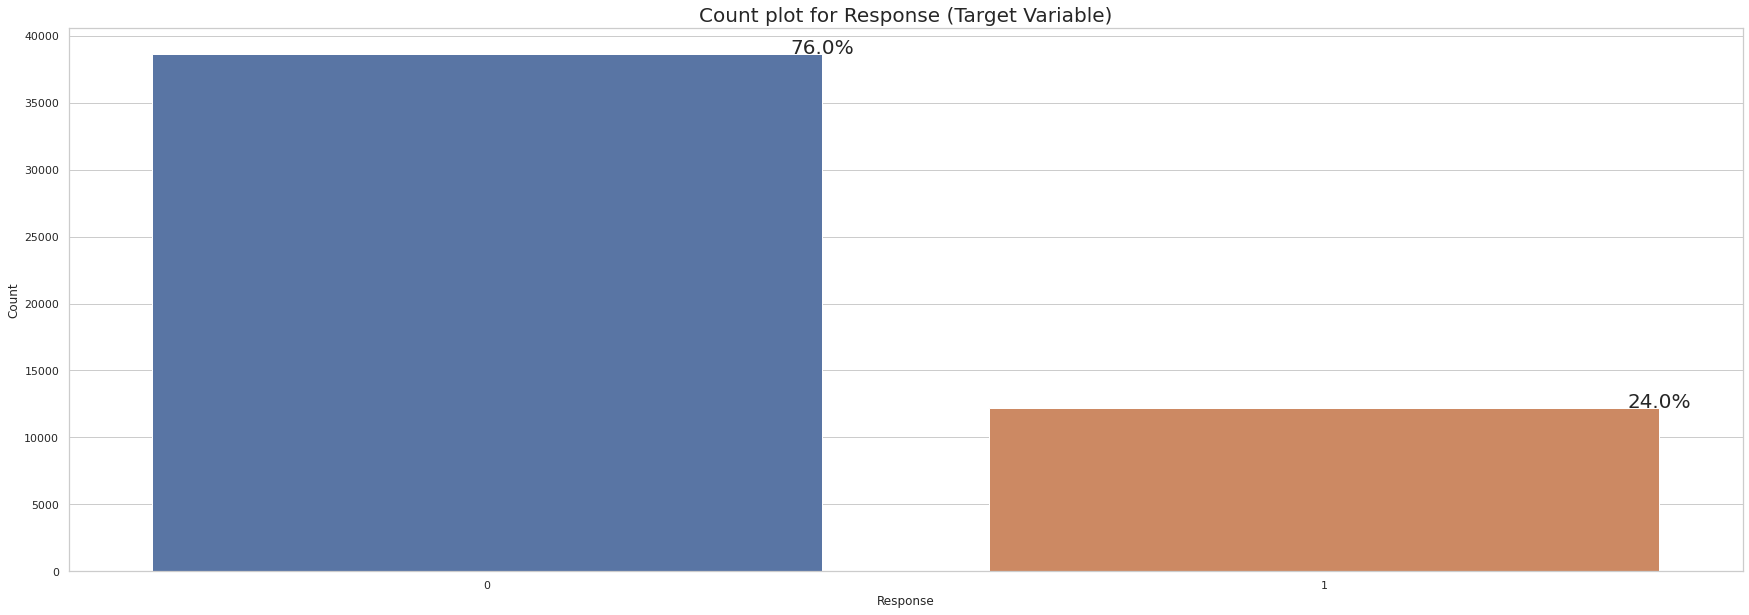

In [51]:
sns.set(style="whitegrid")
plt.figure(figsize=(30,10))
total = data_train.shape[0]
ax = sns.countplot(x = 'Response',data = data_train)
ax.set_ylabel('')
for p in ax.patches:
  percentage = '{:.1f}%'.format(100 * p.get_height()/total)
  x = p.get_x() + p.get_width()
  y = p.get_height()
  ax.annotate(percentage, (x, y),ha='center',fontsize = 20)
  plt.ylabel('Count')
  plt.title('Count plot for Response (Target Variable)',fontdict = {'fontsize' : 20})

# Train-Test split

In [8]:
X = data_train.drop(['ID','Response'],axis = 1)
y = data_train['Response']


In [9]:
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size = 0.2,random_state = 100,stratify = y)
print('shape of x_train : ',X_train.shape)
print('shape of y_train : ',y_train.shape)
print('shape of x_test  : ',X_test.shape)
print('shape of y_test  : ',y_test.shape)

shape of x_train :  (40705, 12)
shape of y_train :  (40705,)
shape of x_test  :  (10177, 12)
shape of y_test  :  (10177,)


In [10]:
print('Null value in train data: ',X_train.isnull().sum().sum())
print('Null value in test data: ',X_test.isnull().sum().sum())

Null value in train data:  0
Null value in test data:  0


In [11]:
number_not_interested = y_train.value_counts()[0]
number_interested = y_train.value_counts()[1]
print('Number of people interested in policy is : ',number_interested )
print('Number of people not interested in policy is : ',number_not_interested )
print('Perecentage of people not interested in policy is : {} %'.format(round((number_not_interested/X_train.shape[0])*100,3)))
print('Perecentage of people interested in policy is : {} %'.format(round((number_interested/X_train.shape[0])*100,3)))

Number of people interested in policy is :  9767
Number of people not interested in policy is :  30938
Perecentage of people not interested in policy is : 76.005 %
Perecentage of people interested in policy is : 23.995 %


In [12]:
number_not_interested = y_test.value_counts()[0]
number_interested = y_test.value_counts()[1]
print('Number of people interested in policy is : ',number_interested )
print('Number of people not interested in policy is : ',number_not_interested )
print('Perecentage of people not interested in policy is : {} %'.format(round((number_not_interested/X_test.shape[0])*100,3)))
print('Perecentage of people interested in policy is : {} %'.format(round((number_interested/X_test.shape[0])*100,3)))

Number of people interested in policy is :  2442
Number of people not interested in policy is :  7735
Perecentage of people not interested in policy is : 76.005 %
Perecentage of people interested in policy is : 23.995 %


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


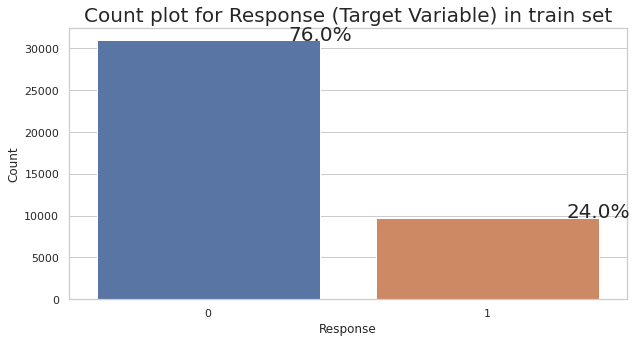

In [52]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
total = X_train.shape[0]
ax = sns.countplot(y_train)
ax.set_ylabel('')
for p in ax.patches:
  percentage = '{:.1f}%'.format(100 * p.get_height()/total)
  x = p.get_x() + p.get_width()
  y = p.get_height()
  ax.annotate(percentage, (x, y),ha='center',fontsize = 20)
  plt.ylabel('Count')
  plt.title('Count plot for Response (Target Variable) in train set',fontdict = {'fontsize' : 20})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


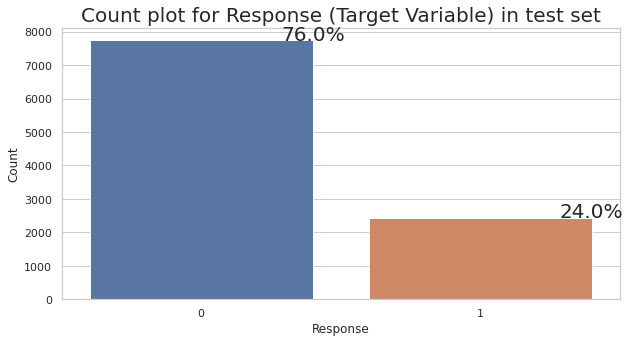

In [53]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
total = X_test.shape[0]
ax = sns.countplot(y_test)
ax.set_ylabel('')
for p in ax.patches:
  percentage = '{:.1f}%'.format(100 * p.get_height()/total)
  x = p.get_x() + p.get_width()
  y = p.get_height()
  ax.annotate(percentage, (x, y),ha='center',fontsize = 20)
  plt.ylabel('Count')
  plt.title('Count plot for Response (Target Variable) in test set',fontdict = {'fontsize' : 20})

In [15]:
categorical_features_train = list(X_train.select_dtypes(include=['object']).columns)
print("Number of Categorical features in Train data : {} features".format(len(categorical_features_train)))
continous_features_train = list(X_train.select_dtypes(include=['float','int']).columns)
print("Number of Continous features in Train data : {} features".format(len(continous_features_train)))

Number of Categorical features in Train data : 6 features
Number of Continous features in Train data : 6 features


In [16]:
categorical_features_train

['City_Code',
 'Accomodation_Type',
 'Reco_Insurance_Type',
 'Is_Spouse',
 'Health Indicator',
 'Holding_Policy_Duration']

In [17]:
categorical_features_train = list(X_test.select_dtypes(include=['object']).columns)
print("Number of Categorical features in Train data : {} features".format(len(categorical_features_train)))
continous_features_train = list(X_test.select_dtypes(include=['float','int']).columns)
print("Number of Continous features in Train data : {} features".format(len(continous_features_train)))

Number of Categorical features in Train data : 6 features
Number of Continous features in Train data : 6 features


In [18]:
# unique levels in each categorical features in train set
features_train = X_train.columns
features_test = X_test.columns
unique_levels_count_train = []
for col in features_train :
  unique_levels_count_train.append(len(X_train[col].unique()))


data_unique_count_train = dict(zip(features_train,unique_levels_count_train))
data_train_unique_count_df = pd.DataFrame(data_unique_count_train,index=[0])
data_train_unique_count_df

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,36,5158,2,2,58,60,2,10,16,5,22,6542


In [55]:
# unique levels in each categorical features in test set
unique_levels_count_test = []
for col in features_test :
  unique_levels_count_test.append(len(X_test[col].unique()))


data_unique_count_test = dict(zip(features_test,unique_levels_count_test))
data_test_unique_count_df = pd.DataFrame(data_unique_count_test,index=[0])
data_test_unique_count_df

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,36,3809,2,2,58,60,2,10,16,5,22,3798


# Feature Engineering

1. Categorical Variables (Response Encoding)

a . Region_Code:

In [20]:
def fit(alpha, feature, X,y):
  df = X.join(y)
  value_count = df[feature].value_counts()
  
  print('Unique levels in feature are : ',dict(value_count).keys())
  print('Total levels in feature are : ',len(dict(value_count).keys()))
  gv_dict = dict()
  #alpha = 1
  for i, denominator in value_count.items():
    vec = []
    for k in range(2):
      cls_cnt = df.loc[(df['Response'] == k) & (df[feature]==i)]
      vec.append((cls_cnt.shape[0] + 10*alpha)/ (denominator + 20*alpha))
    gv_dict[i]=vec
  return gv_dict

def transform(gv_dict, feature, df):
  #gv_dict = get_gv_fea_dict(alpha, feature, df)
  #value_count = data_train.Region_Code.value_counts()
  #print('Done')
  gv_fea = []
  for index, row in df.iterrows():
    #print(row[feature])
    if row[feature] in gv_dict.keys():
      #print(index)
      gv_fea.append(gv_dict[row[feature]])
    else:
      gv_fea.append([0.5,0.5])
  return gv_fea
  

In [21]:
map_region_code = fit(alpha = 1, feature = 'Region_Code',X = X_train, y = y_train)
tr_region_code_re = transform(gv_dict = map_region_code,feature = 'Region_Code',df = X_train)
te_region_code_re = transform(gv_dict = map_region_code,feature = 'Region_Code',df = X_test)
df_tr_region_code_re = pd.DataFrame(tr_region_code_re,columns=['Region_code_0','Region_code_1'])
df_te_region_code_re = pd.DataFrame(te_region_code_re,columns=['Region_code_0','Region_code_1'])
df_tr_region_code_re.head()

Unique levels in feature are :  dict_keys([1, 4, 10, 5, 8, 6, 2, 16, 7, 29, 18, 22, 31, 23, 20, 19, 59, 14, 17, 15, 25, 13, 21, 42, 41, 34, 28, 24, 47, 63, 58, 66, 119, 79, 53, 55, 45, 27, 39, 72, 32, 36, 78, 124, 100, 52, 38, 54, 136, 69, 81, 127, 30, 74, 44, 70, 227, 102, 147, 122, 111, 56, 64, 94, 107, 84, 104, 103, 278, 210, 114, 62, 195, 93, 218, 88, 169, 80, 82, 75, 68, 239, 328, 116, 105, 277, 40, 329, 123, 193, 89, 117, 401, 96, 196, 95, 152, 209, 177, 50, 258, 91, 98, 240, 179, 167, 46, 204, 145, 113, 140, 200, 198, 99, 83, 275, 133, 289, 231, 77, 139, 159, 211, 199, 243, 232, 241, 151, 184, 37, 268, 260, 172, 180, 85, 217, 71, 318, 250, 341, 208, 67, 128, 143, 154, 125, 213, 86, 333, 206, 160, 158, 296, 120, 383, 308, 207, 264, 203, 181, 26, 470, 138, 224, 293, 222, 149, 262, 156, 248, 134, 175, 366, 132, 185, 223, 272, 354, 153, 173, 327, 331, 446, 357, 233, 263, 165, 219, 643, 202, 390, 157, 186, 582, 614, 253, 170, 238, 112, 303, 176, 192, 244, 339, 274, 162, 290, 337, 146

,Region_code_0,Region_code_1
0,0.673913,0.326087
1,0.617647,0.382353
2,0.545455,0.454545
3,0.666667,0.333333
4,0.633333,0.366667


In [22]:
df_tr_region_code_re.shape

(40705, 2)

In [23]:
X_train.groupby(['Reco_Policy_Cat'])['Region_Code'].count().sort_values().index

Int64Index([10, 11, 8, 9, 7, 6, 5, 4, 3, 15, 13, 14, 2, 1, 12, 20, 19, 17, 16,
            21, 18, 22],
           dtype='int64', name='Reco_Policy_Cat')

In [24]:
categorical_features_train,continous_features_train

(['City_Code',
  'Accomodation_Type',
  'Reco_Insurance_Type',
  'Is_Spouse',
  'Health Indicator',
  'Holding_Policy_Duration'],
 ['Region_Code',
  'Upper_Age',
  'Lower_Age',
  'Holding_Policy_Type',
  'Reco_Policy_Cat',
  'Reco_Policy_Premium'])

## Label and one hot coding for other categorical features

In [25]:
cat_feature_list = ['City_Code','Holding_Policy_Duration','Health Indicator','Holding_Policy_Type','Reco_Policy_Cat']

In [26]:
label_encoded_map_dict = {}
for col in cat_feature_list:
  z = {k: i+1 for i, k in enumerate(X_train.groupby([col])['Region_Code'].count().sort_values().index)}
  label_encoded_map_dict[col]=z

In [27]:
label_encoded_map_dict

{'City_Code': {'C1': 36,
  'C10': 28,
  'C11': 24,
  'C12': 19,
  'C13': 22,
  'C14': 17,
  'C15': 26,
  'C16': 23,
  'C17': 25,
  'C18': 18,
  'C19': 20,
  'C2': 35,
  'C20': 21,
  'C21': 16,
  'C22': 12,
  'C23': 15,
  'C24': 14,
  'C25': 10,
  'C26': 13,
  'C27': 9,
  'C28': 7,
  'C29': 11,
  'C3': 34,
  'C30': 4,
  'C31': 1,
  'C32': 6,
  'C33': 8,
  'C34': 5,
  'C35': 3,
  'C36': 2,
  'C4': 33,
  'C5': 27,
  'C6': 31,
  'C7': 30,
  'C8': 29,
  'C9': 32},
 'Health Indicator': {'No Health Indicator': 9,
  'X1': 10,
  'X2': 8,
  'X3': 7,
  'X4': 6,
  'X5': 5,
  'X6': 4,
  'X7': 3,
  'X8': 2,
  'X9': 1},
 'Holding_Policy_Duration': {'1.0': 15,
  '10.0': 5,
  '11.0': 4,
  '12.0': 3,
  '13.0': 2,
  '14+': 14,
  '14.0': 1,
  '2.0': 13,
  '3.0': 12,
  '4.0': 11,
  '5.0': 10,
  '6.0': 9,
  '7.0': 8,
  '8.0': 7,
  '9.0': 6,
  'No Holding_Policy_Duration': 16},
 'Holding_Policy_Type': {-1.0: 5, 1.0: 3, 2.0: 2, 3.0: 4, 4.0: 1},
 'Reco_Policy_Cat': {1: 14,
  2: 13,
  3: 9,
  4: 8,
  5: 7,
  6:

In [28]:
X_train_label_encoded = X_train.copy()
for col in cat_feature_list:
  X_train_label_encoded[col] = X_train[col].map(label_encoded_map_dict[col])
X_train_label_encoded.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
24206,33,184,Rented,Individual,68,68,No,6,14,4,22,14742.0
37495,36,785,Owned,Joint,71,52,No,10,10,4,22,28476.0
41274,33,1953,Rented,Individual,21,21,No,10,16,5,12,8400.0
1584,36,410,Owned,Joint,53,52,Yes,6,13,4,22,23628.8
15951,34,2316,Rented,Individual,22,22,No,8,16,5,21,11344.0


In [29]:
print('Number of NaN after encoding train set are :',X_train_label_encoded.isnull().sum().sum())

Number of NaN after encoding train set are : 0


In [30]:
X_test_label_encoded = X_test.copy()

for col in cat_feature_list:
  X_test_label_encoded [col] = X_test[col].map(label_encoded_map_dict[col])
X_test_label_encoded .head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
26425,33,3712,Owned,Individual,75,75,No,10,12,3,20,23200.0
1463,16,5103,Rented,Individual,71,71,No,8,10,2,16,19482.0
17621,15,91,Rented,Individual,22,22,No,7,16,5,21,8876.0
24375,36,1663,Rented,Individual,69,69,No,9,14,3,19,14544.0
19664,26,1867,Rented,Individual,50,50,No,6,16,5,14,18256.0


In [31]:
OHE_fit_reco_ins_type = OneHotEncoder(sparse=False)

OHE_fit_reco_ins_type  = OHE_fit_reco_ins_type.fit(np.array(X_train['Reco_Insurance_Type']).reshape(-1,1))

OHE_tr_Reco_Insurance_Type = OHE_fit_reco_ins_type.transform(np.array(X_train['Reco_Insurance_Type']).reshape(-1,1))
OHE_te_Reco_Insurance_Type = OHE_fit_reco_ins_type.transform(np.array(X_test['Reco_Insurance_Type']).reshape(-1,1))

df_tr_Reco_Insurance_Type = pd.DataFrame(OHE_tr_Reco_Insurance_Type ,columns=['Reco_Insurance_type_Individual','Reco_Insurance_type_Joint'])
df_te_Reco_Insurance_Type = pd.DataFrame(OHE_te_Reco_Insurance_Type,columns=['Reco_Insurance_type_Individual','Reco_Insurance_type_Joint'])


df_tr_Reco_Insurance_Type.head()

,Reco_Insurance_type_Individual,Reco_Insurance_type_Joint
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0


In [32]:
OHE_fit_acco_type = OneHotEncoder(sparse=False)
OHE_fit_acco_type = OHE_fit_acco_type.fit(np.array(X_train.Accomodation_Type).reshape(-1,1))

OHE_tr_Acco_Type = OHE_fit_acco_type .transform(np.array(X_train.Accomodation_Type).reshape(-1,1))
OHE_te_Acco_Type = OHE_fit_acco_type .transform(np.array(X_test.Accomodation_Type).reshape(-1,1))

df_tr_Acco_Type = pd.DataFrame(OHE_tr_Acco_Type ,columns=['Accomodation_type_Owned','Accomodation_type_Rented'])
df_te_Acco_Type = pd.DataFrame(OHE_te_Acco_Type,columns=['Accomodation_type_Owned','Accomodation_type_Rented'])




In [33]:
OHE_te_Acco_Type.shape

(10177, 2)

In [34]:
OHE_fit_is_spouse = OneHotEncoder(sparse=False)
OHE_fit_is_spouse = OHE_fit_is_spouse.fit(np.array(X_train.Is_Spouse).reshape(-1,1))

OHE_tr_Is_Spouse = OHE_fit_is_spouse.transform(np.array(X_train.Is_Spouse).reshape(-1,1))
OHE_te_Is_Spouse = OHE_fit_is_spouse.transform(np.array(X_test.Is_Spouse).reshape(-1,1))

df_tr_Is_Spouse = pd.DataFrame(OHE_tr_Is_Spouse ,columns=['Is_Spouse_No','Is_Spouse_Yes'])
df_te_Is_Spouse = pd.DataFrame(OHE_te_Is_Spouse,columns=['Is_Spouse_No','Is_Spouse_Yes'])


df_te_Is_Spouse.head(5)

,Is_Spouse_No,Is_Spouse_Yes
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [35]:
df_tr_label_encoded = X_train_label_encoded[cat_feature_list]
df_tr_label_encoded 

,City_Code,Holding_Policy_Duration,Health Indicator,Holding_Policy_Type,Reco_Policy_Cat
24206,33,14,6,4,22
37495,36,10,10,4,22
41274,33,16,10,5,12
1584,36,13,6,4,22
15951,34,16,8,5,21
...,...,...,...,...,...
20772,35,5,9,1,18
32936,35,16,10,5,22
37459,17,16,9,5,20
28521,30,15,10,3,17


In [36]:
df_tr_label_encoded = X_train_label_encoded[cat_feature_list]
df_te_label_encoded = X_test_label_encoded[cat_feature_list]

df_tr_label_encoded = df_tr_label_encoded.values
df_te_label_encoded = df_te_label_encoded.values

In [37]:
tr_upper_age_val = X_train.Upper_Age.values.reshape(-1,1)
te_upper_age_val = X_test.Upper_Age.values.reshape(-1,1)

tr_lower_age = X_train.Lower_Age.values.reshape(-1,1)
te_lower_age = X_test.Lower_Age.values.reshape(-1,1)

tr_prem_val = X_train.Reco_Policy_Premium.values.reshape(-1,1)
te_prem_val = X_test.Reco_Policy_Premium.values.reshape(-1,1)

In [38]:
te_upper_age_val.shape

(10177, 1)

In [39]:

t1 = np.hstack((tr_region_code_re,df_tr_label_encoded,OHE_tr_Reco_Insurance_Type,OHE_tr_Acco_Type,OHE_tr_Is_Spouse,tr_upper_age_val,tr_lower_age,tr_prem_val))
t2 =  np.hstack((te_region_code_re,df_te_label_encoded,OHE_te_Reco_Insurance_Type,OHE_te_Acco_Type,OHE_te_Is_Spouse,te_upper_age_val,te_lower_age,te_prem_val))
t2.shape

(10177, 16)

In [40]:
pd.DataFrame(t1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.673913,0.326087,33.0,14.0,6.0,4.0,22.0,1.0,0.0,0.0,1.0,1.0,0.0,68.0,68.0,14742.0
1,0.617647,0.382353,36.0,10.0,10.0,4.0,22.0,0.0,1.0,1.0,0.0,1.0,0.0,71.0,52.0,28476.0
2,0.545455,0.454545,33.0,16.0,10.0,5.0,12.0,1.0,0.0,0.0,1.0,1.0,0.0,21.0,21.0,8400.0
3,0.666667,0.333333,36.0,13.0,6.0,4.0,22.0,0.0,1.0,1.0,0.0,0.0,1.0,53.0,52.0,23628.8
4,0.633333,0.366667,34.0,16.0,8.0,5.0,21.0,1.0,0.0,0.0,1.0,1.0,0.0,22.0,22.0,11344.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40700,0.535714,0.464286,35.0,5.0,9.0,1.0,18.0,1.0,0.0,1.0,0.0,1.0,0.0,50.0,50.0,11592.0
40701,0.612903,0.387097,35.0,16.0,10.0,5.0,22.0,1.0,0.0,1.0,0.0,1.0,0.0,24.0,24.0,3954.0
40702,0.538462,0.461538,17.0,16.0,9.0,5.0,20.0,1.0,0.0,0.0,1.0,1.0,0.0,47.0,47.0,17758.0
40703,0.575758,0.424242,30.0,15.0,10.0,3.0,17.0,1.0,0.0,0.0,1.0,1.0,0.0,21.0,21.0,10864.0


In [41]:
train_df = pd.DataFrame(t1,columns=['Region_code_0','Region_code_1','City_Code','Holding_Policy_Duration','Health Indicator','Holding_Policy_Type',	'Reco_Policy_Cat','Reco_Insurance_type_Individual','Reco_Insurance_type_Joint','Accomodation_type_Owned','Accomodation_type_Rented','Is_Spouse_No','Is_Spouse_Yes','Upper_Age','Lower_Age','Reco_Policy_Premium'])
test_df = pd.DataFrame(t2,columns=['Region_code_0','Region_code_1','City_Code','Holding_Policy_Duration','Health Indicator','Holding_Policy_Type',	'Reco_Policy_Cat','Reco_Insurance_type_Individual','Reco_Insurance_type_Joint','Accomodation_type_Owned','Accomodation_type_Rented','Is_Spouse_No','Is_Spouse_Yes','Upper_Age','Lower_Age','Reco_Policy_Premium'])


train_df.shape,test_df.shape

((40705, 16), (10177, 16))

Text(0.5, 1.0, 'Correlation heatmap')

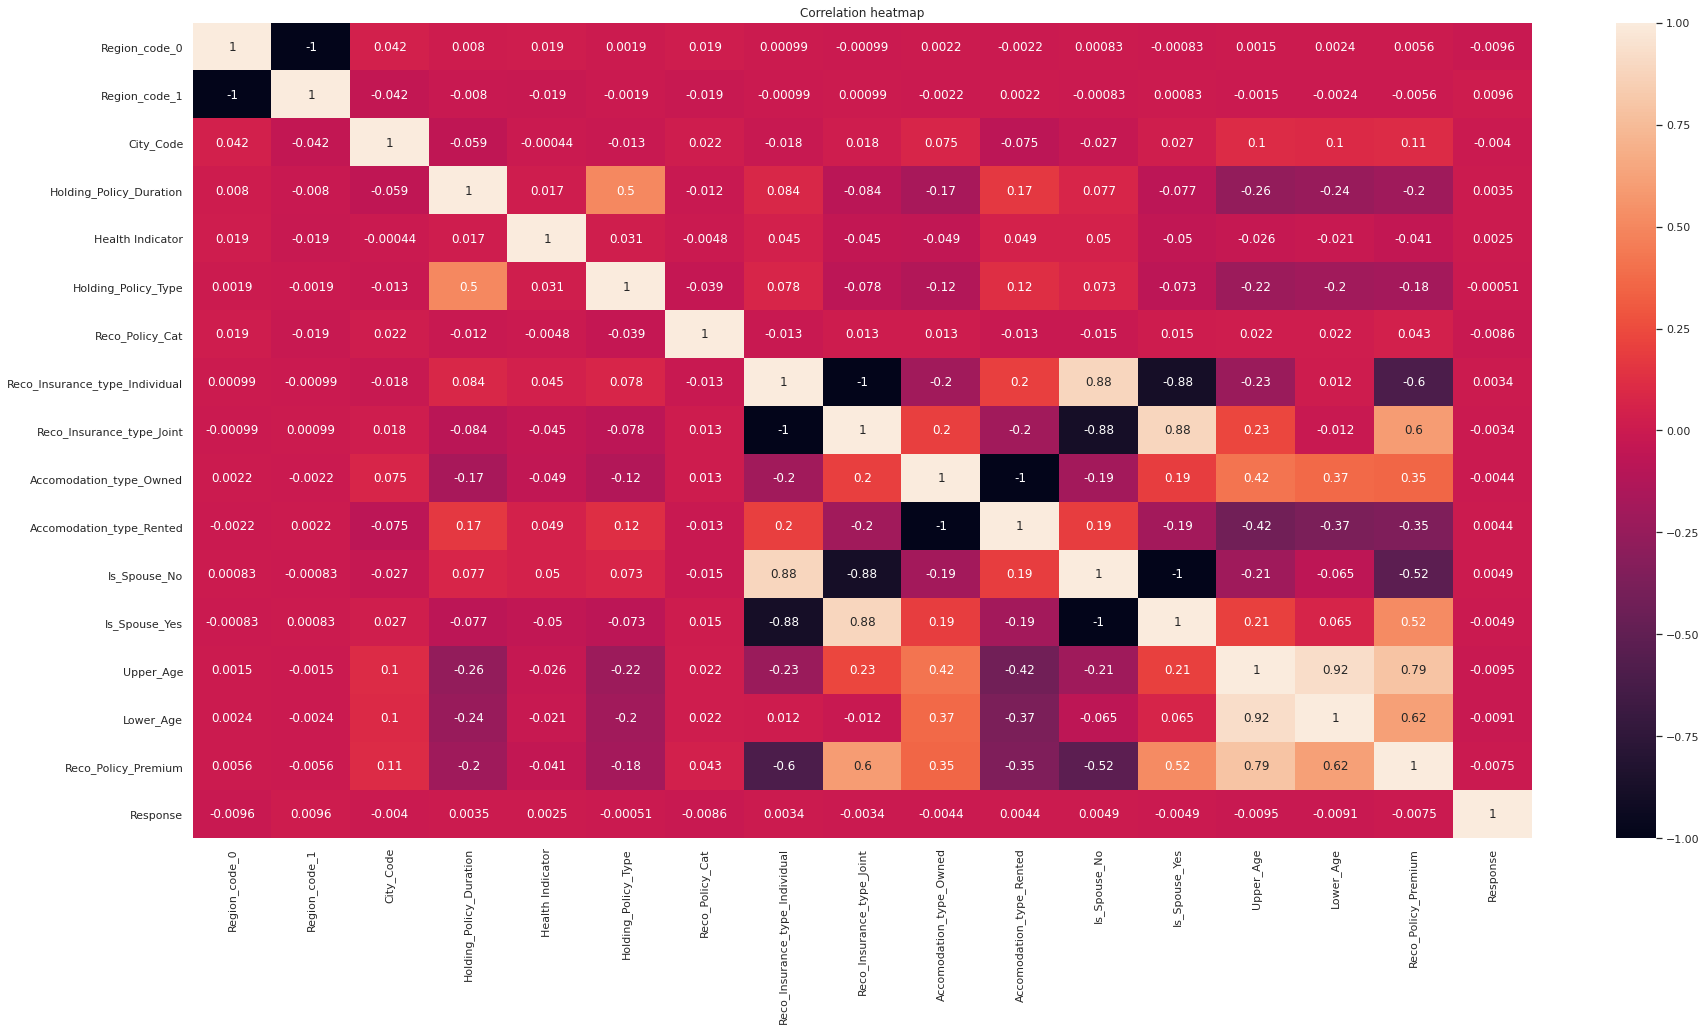

In [42]:
df1 = train_df.join(y_train)
plt.figure(figsize = (30,15))
correlation = df1.corr()
sns.heatmap(correlation,annot=True)
plt.title('Correlation heatmap')

# Modeling

In [43]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    
    labels = [0,1]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(5,5))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()


    re = C[1][1]/C[1,:].sum()
    pr = C[1][1]/C[:,1].sum()

    print('Precision : ',pr)
    print('Recall : ',re)


1. KNN

In [ ]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=25)

#Train the model using the training sets
knn.fit(train_df, y_train)

#Predict the response for test dataset
y_pred = knn.predict(test_df)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7396089220791982


In [ ]:
knn_model = KNeighborsClassifier()


#scoring = {'MAE': make_scorer(mean_absolute_error), 'RMSE': 'neg_root_mean_squared_error'}
#define your own mse and set greater_is_better=False
#mse = make_scorer(mean_absolute_error,greater_is_better=False)
param_grid = {

    'n_neighbors': [20,30,50,60,80,100]

}


grid_search = GridSearchCV(estimator = knn_model , param_grid = param_grid, cv = 5,return_train_score=True,scoring="roc_auc",verbose = 10,refit =True,n_jobs =-1 )
grid_search.fit(train_df,y_train)

print('best parameter : ',grid_search.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  5.1min finished


best parameter :  {'n_neighbors': 100}


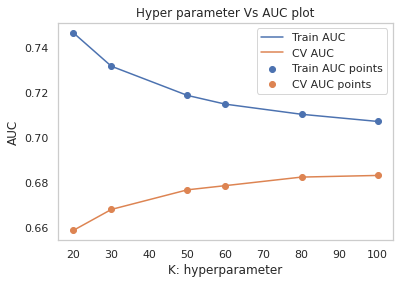

In [ ]:
results = pd.DataFrame.from_dict(grid_search.cv_results_)

results = results.sort_values(['param_n_neighbors'])


train_auc= np.abs(results['mean_train_score'])
train_auc_std= results['std_score_time']
cv_auc = np.abs(results['mean_test_score'] )
cv_auc_std= results['std_test_score']
k =  results['param_n_neighbors']


plt.plot(k,train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(k, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(k, train_auc, label='Train AUC points')
plt.scatter(k, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

-------------------- Confusion matrix --------------------


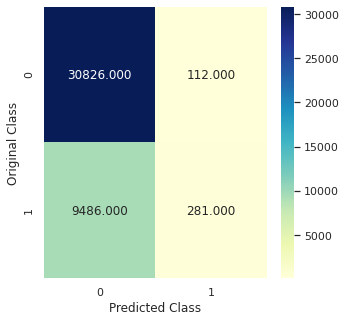

Precision :  0.7150127226463104
Recall :  0.028770349134841815
Train ROC_AUC: 0.7039599697980728
Test ROC_AUC: 0.5929279252808664


In [ ]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=150)
#Train the model using the training sets
knn.fit(train_df, y_train)

#Predict the response for test dataset
y_pred_tr = knn.predict_proba(train_df)[:,1]
y_pred_te = knn.predict_proba(test_df)[:,1]
#Import scikit-learn metrics module for accuracy calculation

# Model Accuracy, how often is the classifier correct?

plot_confusion_matrix(test_y=y_train, predict_y = knn.predict(train_df))

print("Train ROC_AUC:",metrics.roc_auc_score(y_train, y_pred_tr))
print("Test ROC_AUC:",metrics.roc_auc_score(y_test, y_pred_te))

# 2. Logistic Regression

In [ ]:
sgd = SGDClassifier(loss="log", penalty="l2", max_iter=5) 

param_grid = {

    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] 

}
grid_search = GridSearchCV(estimator = sgd , param_grid = param_grid, cv = 5,return_train_score=True,scoring="roc_auc",verbose = 10,refit =True,n_jobs =-1 )
grid_search.fit(train_df,y_train)

print('best parameter : ',grid_search.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1800s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.0s


best parameter :  {'alpha': 0.001}


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    3.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-------------------- Confusion matrix --------------------


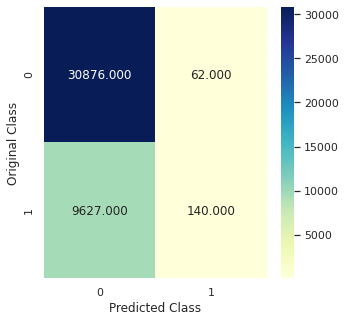

Precision :  0.693069306930693
Recall :  0.01433398177536603
Train ROC_AUC: 0.6947574391261311
Test ROC_AUC: 0.6000895236189354


In [ ]:
sgd = SGDClassifier(alpha=0.001,loss="log", penalty="l2", max_iter=5) 

sgd.fit(train_df,y_train)

y_pred_tr = sgd.predict_proba(train_df)[:,1]
y_pred_te = sgd.predict_proba(test_df)[:,1]
#Import scikit-learn metrics module for accuracy calculation

# Model Accuracy, how often is the classifier correct?

plot_confusion_matrix(test_y=y_train, predict_y = sgd.predict(train_df))

print("Train ROC_AUC:",metrics.roc_auc_score(y_train, y_pred_tr))
print("Test ROC_AUC:",metrics.roc_auc_score(y_test, y_pred_te))

In [ ]:
logistic_reg = LogisticRegression( max_iter=100)

tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4,10**6]}]
grid_search = GridSearchCV(estimator = logistic_reg,param_grid = tuned_parameters, scoring = 'roc_auc', cv=5)
grid_search.fit(train_df, y_train)
print('best parameter : ',grid_search.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


best parameter :  {'C': 1000000}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


-------------------- Confusion matrix --------------------


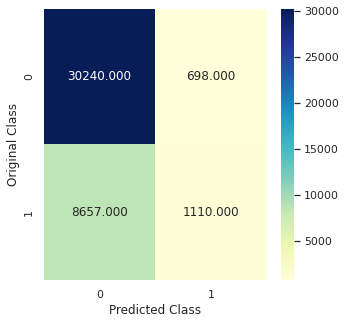

Precision :  0.6139380530973452
Recall :  0.11364799836183065
Train ROC_AUC: 0.6961834937904755
Test ROC_AUC: 0.5896633308398014


In [ ]:
logistic_reg = LogisticRegression(C = 10000, max_iter=100)

logistic_reg.fit(train_df,y_train)

y_pred_tr = logistic_reg.predict_proba(train_df)[:,1]
y_pred_te = logistic_reg.predict_proba(test_df)[:,1]
#Import scikit-learn metrics module for accuracy calculation

# Model Accuracy, how often is the classifier correct?

plot_confusion_matrix(test_y=y_train, predict_y = logistic_reg.predict(train_df))

print("Train ROC_AUC:",metrics.roc_auc_score(y_train, y_pred_tr))
print("Test ROC_AUC:",metrics.roc_auc_score(y_test, y_pred_te))

# 3. SVM

In [ ]:
svm = SVC(C = 1.0, probability=True)

svm.fit(train_df,y_train)



y_pred_tr = svm.predict_proba(train_df)[:,1]
y_pred_te = svm.predict_proba(test_df)[:,1]
#Import scikit-learn metrics module for accuracy calculation

# Model Accuracy, how often is the classifier correct?

plot_confusion_matrix(test_y=y_train, predict_y = svm.predict(train_df))

print("Train ROC_AUC:",metrics.roc_auc_score(y_train, y_pred_tr))
print("Test ROC_AUC:",metrics.roc_auc_score(y_test, y_pred_te))

# 4. Decision Tree:

-------------------- Confusion matrix --------------------


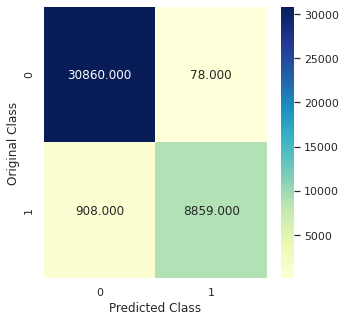

Precision :  0.991272239006378
Recall :  0.9070338896283403
Train ROC_AUC: 0.9965051446323622
Test ROC_AUC: 0.5516117427882133


In [ ]:
dt = DecisionTreeClassifier(max_depth = 25,random_state=0)

dt.fit(train_df,y_train)



y_pred_tr =dt.predict_proba(train_df)[:,1]
y_pred_te = dt.predict_proba(test_df)[:,1]
#Import scikit-learn metrics module for accuracy calculation

# Model Accuracy, how often is the classifier correct?

plot_confusion_matrix(test_y=y_train, predict_y = dt.predict(train_df))

print("Train ROC_AUC:",metrics.roc_auc_score(y_train, y_pred_tr))
print("Test ROC_AUC:",metrics.roc_auc_score(y_test, y_pred_te))

In [ ]:
dt = DecisionTreeClassifier()

param_grid = {
    'max_depth': [7,10,25,50,75,100],
    'min_samples_split': [25,50,100,250,500,750],
    'min_samples_leaf' : [10,25,50,75,100]
}

grid_search = GridSearchCV(estimator = dt,param_grid = param_grid, scoring = 'roc_auc',verbose = 1, cv=5)
grid_search.fit(train_df, y_train)
print('best parameter : ',grid_search.best_params_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:  3.3min finished


best parameter :  {'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 25}


-------------------- Confusion matrix --------------------


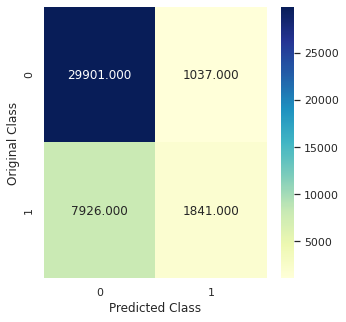

Precision :  0.6396803335649757
Recall :  0.18849186034606327
Train ROC_AUC: 0.7435132471120386
Test ROC_AUC: 0.594584297525474


In [ ]:
dt = DecisionTreeClassifier(max_depth= 10, min_samples_leaf= 100, min_samples_split= 25,random_state=10)
dt.fit(train_df,y_train)

y_pred_tr =dt.predict_proba(train_df)[:,1]
y_pred_te = dt.predict_proba(test_df)[:,1]
#Import scikit-learn metrics module for accuracy calculation

# Model Accuracy, how often is the classifier correct?

plot_confusion_matrix(test_y=y_train, predict_y = dt.predict(train_df))

print("Train ROC_AUC:",metrics.roc_auc_score(y_train, y_pred_tr))
print("Test ROC_AUC:",metrics.roc_auc_score(y_test, y_pred_te))

# 5. Random Forest

In [ ]:
# Number of trees in random forest
n_estimators = [100,200,500,1000,2000] #[200.,400.,600.,800.,1000.,1200.,1400.,1600.,1800.,2000.]
# Number of features to consider at every split
max_features = ['auto','sqrt']
# Maximum number of levels in tree
max_depth = [5,10,20,30,40,50]  #[10.,20.,30.,40.,50.,60.,70.,80.,90.,100.,110.]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]


random_grid = {
               'n_estimators': n_estimators,
               #'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               #'bootstrap': bootstrap
               }# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(n_jobs = -1)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
grid_search = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='roc_auc', n_iter = 100, cv = 3,return_train_score=True, verbose=2, random_state=42)

grid_search.fit(train_df,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_depth=40 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_depth=40, total=   8.8s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_depth=40 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.8s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_depth=40, total=   7.7s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_depth=40 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_depth=40, total=   7.6s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_depth=5 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_depth=5, total=  13.7s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_depth=5 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_depth=5, total=  13.7s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_depth=5 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_depth=5, total=  13.8s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_depth=30, total=  37.9s
[CV] n_estimators=1000, min_samples_split=10,

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 172.8min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
print('best parameter : ',grid_search.best_params_)

best parameter :  {'n_estimators': 2000, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 20}


-------------------- Confusion matrix --------------------


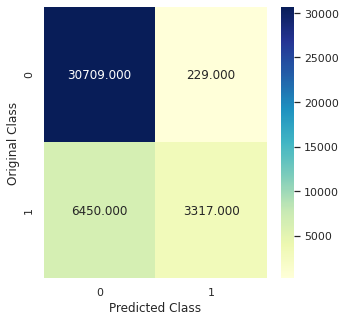

Precision :  0.9354201917653694
Recall :  0.3396129824920651
-------------------- Confusion matrix --------------------


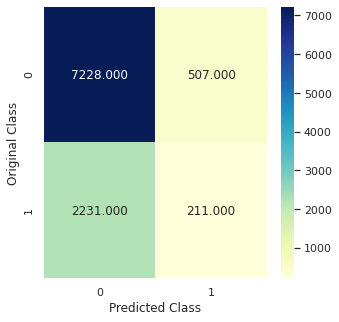

Precision :  0.2938718662952646
Recall :  0.08640458640458641
Train ROC_AUC: 0.9762691541675319
Test ROC_AUC: 0.591800885918533


In [ ]:
rf = RandomForestClassifier(n_estimators=2000 ,min_samples_leaf=5,min_samples_split=10,max_depth=50,n_jobs = -1)
rf.fit(train_df,y_train)

y_pred_tr =rf.predict_proba(train_df)[:,1]
y_pred_te = rf.predict_proba(test_df)[:,1]
#Import scikit-learn metrics module for accuracy calculation

# Model Accuracy, how often is the classifier correct?

plot_confusion_matrix(test_y=y_train, predict_y = rf.predict(train_df))
plot_confusion_matrix(test_y=y_test, predict_y = rf.predict(test_df))

print("Train ROC_AUC:",metrics.roc_auc_score(y_train, y_pred_tr))
print("Test ROC_AUC:",metrics.roc_auc_score(y_test, y_pred_te))

#30 ---->0.6264

-------------------- Confusion matrix --------------------


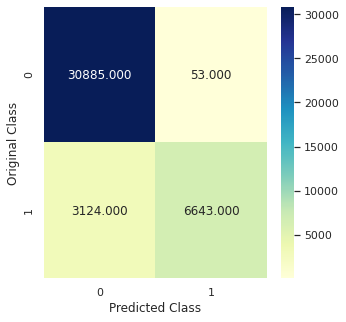

Precision :  0.9920848267622461
Recall :  0.6801474352411181
-------------------- Confusion matrix --------------------


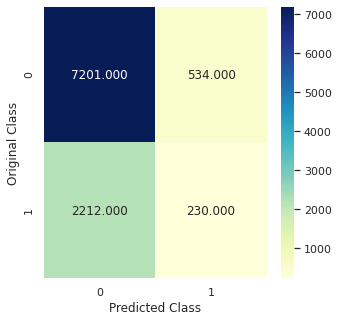

Precision :  0.3010471204188482
Recall :  0.09418509418509419
Train ROC_AUC: 0.9978331705107569
Test ROC_AUC: 0.5974703092350151


In [45]:
rf = RandomForestClassifier(n_estimators=3000 ,min_samples_leaf=2,min_samples_split=7,max_depth=40,n_jobs = -1)
rf.fit(train_df,y_train)

y_pred_tr =rf.predict_proba(train_df)[:,1]
y_pred_te = rf.predict_proba(test_df)[:,1]
#Import scikit-learn metrics module for accuracy calculation

# Model Accuracy, how often is the classifier correct?

plot_confusion_matrix(test_y=y_train, predict_y = rf.predict(train_df))
plot_confusion_matrix(test_y=y_test, predict_y = rf.predict(test_df))

print("Train ROC_AUC:",metrics.roc_auc_score(y_train, y_pred_tr))
print("Test ROC_AUC:",metrics.roc_auc_score(y_test, y_pred_te))

# Xgboost

In [ ]:
!pip3 install xgboost

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [ ]:
'''
Here we evaluate model performance . We use here xgboost cv function that will do crossvalidation for us
and will gives us number of boosting round required for training xgboost .And that we will use as number of trees or n_estimator.
'''


def evaluate(xgb1,X_train,y_train,X_test,y_test):
  xgb_param = xgb1.get_xgb_params()

  xgb_train = xgb.DMatrix(X_train,y_train)
  cvresult = xgb.cv(xgb_param,xgb_train,num_boost_round=xgb1.get_params()['n_estimators'],nfold = 5,metrics='auc',
                  early_stopping_rounds=100)
  #print(cvresult)

  xgb1.set_params(n_estimators=cvresult.shape[0])
  print('Number of estimators: ',cvresult.shape[0])

  xgb1.fit(X_train,y_train,eval_metric='auc')

  y_train_pred = xgb1.predict_proba(X_train)[:,1]
  y_test_pred = xgb1.predict_proba(X_test)[:,1]


  train_score =  roc_auc_score(y_train,y_train_pred )
  test_score = roc_auc_score(y_test,y_test_pred)

  print('train roc_auc_score = ',train_score)
  print('test roc_auc_score = ',test_score)

In [ ]:
xgb1 = xgb.XGBClassifier(learning_rate =0.1,n_estimators=5000,max_depth=5,min_child_weight=1,
                      gamma=0,subsample=0.8,colsample_bytree=0.8,tree_method='gpu_hist',
                      prdictor = 'gpu_predictor',objective = 'binary:logistic',nthread=4)


evaluate(xgb1,train_df,y_train,test_df,y_test)

Number of estimators:  236
train roc_auc_score =  0.8206291222500223
test roc_auc_score =  0.6067283537871773


### Hyper Parameter tunning:


1. max_depth and min_child_weight

In [ ]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
clf = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              importance_type='gain', learning_rate=0.1,max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=None, n_estimators=300,
              n_jobs=1, nthread=None, objective='binary:logistic',
              prdictor='gpu_predictor', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.8, tree_method='gpu_hist', verbosity=1)

gsearch1 = GridSearchCV(estimator =clf,param_grid = param_test1,scoring='roc_auc',cv = 5,verbose=3)
gsearch1.fit(train_df,y_train)
gsearch1.best_params_,gsearch1.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=3, min_child_weight=1 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... max_depth=3, min_child_weight=1, score=0.730, total=   1.5s
[CV] max_depth=3, min_child_weight=1 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] ..... max_depth=3, min_child_weight=1, score=0.730, total=   1.5s
[CV] max_depth=3, min_child_weight=1 .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s remaining:    0.0s


[CV] ..... max_depth=3, min_child_weight=1, score=0.748, total=   1.5s
[CV] max_depth=3, min_child_weight=1 .................................
[CV] ..... max_depth=3, min_child_weight=1, score=0.739, total=   1.5s
[CV] max_depth=3, min_child_weight=1 .................................
[CV] ..... max_depth=3, min_child_weight=1, score=0.738, total=   1.5s
[CV] max_depth=3, min_child_weight=3 .................................
[CV] ..... max_depth=3, min_child_weight=3, score=0.729, total=   1.5s
[CV] max_depth=3, min_child_weight=3 .................................
[CV] ..... max_depth=3, min_child_weight=3, score=0.731, total=   1.5s
[CV] max_depth=3, min_child_weight=3 .................................
[CV] ..... max_depth=3, min_child_weight=3, score=0.748, total=   1.5s
[CV] max_depth=3, min_child_weight=3 .................................
[CV] ..... max_depth=3, min_child_weight=3, score=0.737, total=   1.5s
[CV] max_depth=3, min_child_weight=3 .................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  2.4min finished


({'max_depth': 5, 'min_child_weight': 3},
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.8, gamma=0,
               learning_rate=0.1, max_delta_step=0, max_depth=5,
               min_child_weight=3, missing=None, n_estimators=300, n_jobs=1,
               nthread=None, objective='binary:logistic',
               prdictor='gpu_predictor', random_state=0, reg_alpha=0,
               reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
               subsample=0.8, tree_method='gpu_hist', verbosity=1))

In [ ]:
clf = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.8, gamma=0,
               learning_rate=0.1, max_delta_step=0, max_depth=5,
               min_child_weight=3, missing=None, n_estimators=300, n_jobs=1,
               nthread=None, objective='binary:logistic',
               prdictor='gpu_predictor', random_state=0, reg_alpha=0,
               reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
               subsample=0.8, tree_method='gpu_hist', verbosity=1)
evaluate(clf ,train_df,y_train,test_df,y_test)

Number of estimators:  300
train roc_auc_score =  0.8305289391903694
test roc_auc_score =  0.6106201429730841


-------------------- Confusion matrix --------------------


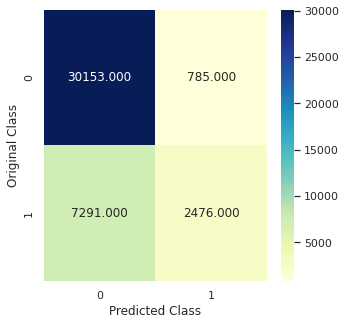

Precision :  0.7592762956148421
Recall :  0.25350670625575916
-------------------- Confusion matrix --------------------


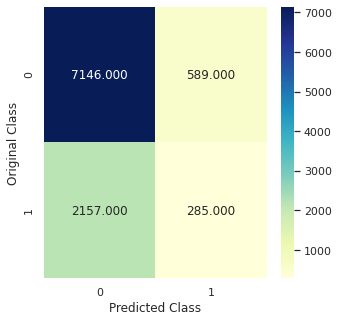

Precision :  0.32608695652173914
Recall :  0.1167076167076167
Train ROC_AUC: 0.8305289391903694
Test ROC_AUC: 0.6106201429730841


In [ ]:
 clf = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.8, gamma=0,
               learning_rate=0.1, max_delta_step=0, max_depth=5,
               min_child_weight=3, missing=None, n_estimators=300, n_jobs=1,
               nthread=None, objective='binary:logistic',
               prdictor='gpu_predictor', random_state=0, reg_alpha=0,
               reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
               subsample=0.8, tree_method='gpu_hist', verbosity=1)
 

clf.fit(train_df,y_train)


y_pred_tr =clf.predict_proba(train_df)[:,1]
y_pred_te = clf.predict_proba(test_df)[:,1]
#Import scikit-learn metrics module for accuracy calculation

# Model Accuracy, how often is the classifier correct?

plot_confusion_matrix(test_y=y_train, predict_y = clf.predict(train_df))
plot_confusion_matrix(test_y=y_test, predict_y = clf.predict(test_df))

print("Train ROC_AUC:",metrics.roc_auc_score(y_train, y_pred_tr))
print("Test ROC_AUC:",metrics.roc_auc_score(y_test, y_pred_te))

2. gamma:

In [ ]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}

clf = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.8, gamma=0,
               learning_rate=0.1, max_delta_step=0, max_depth=5,
               min_child_weight=2, missing=None, n_estimators=300, n_jobs=1,
               nthread=None, objective='binary:logistic',
               prdictor='gpu_predictor', random_state=0, reg_alpha=0,
               reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
               subsample=0.8, tree_method='gpu_hist', verbosity=1)
 

gsearch1 = GridSearchCV(estimator =clf,param_grid = param_test3,scoring='roc_auc',cv = 5,verbose=3)
gsearch1.fit(train_df,y_train)

gsearch1.best_params_,gsearch1.best_estimator_

3. subsample and colsample_bytree

In [ ]:
param_test4 = {
 'subsample':[i/10.0 for i in range(5,11)],
 'colsample_bytree':[i/10.0 for i in range(5,11)],

}



clf = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.8, gamma=0,
               learning_rate=0.1, max_delta_step=0, max_depth=5,
               min_child_weight=2, missing=None, n_estimators=300, n_jobs=1,
               nthread=None, objective='binary:logistic',
               prdictor='gpu_predictor', random_state=0, reg_alpha=0,
               reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
               subsample=0.8, tree_method='gpu_hist', verbosity=1)
 

gsearch1 = GridSearchCV(estimator =clf,param_grid = param_test4,scoring='roc_auc',cv = 5,verbose=3)
gsearch1.fit(train_df,y_train)

gsearch1.best_params_,gsearch1.best_estimator_

-------------------- Confusion matrix --------------------


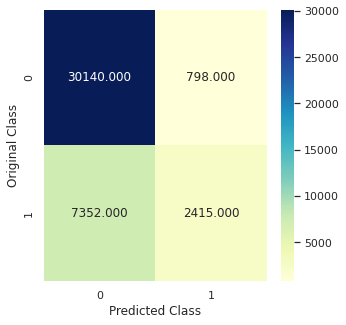

Precision :  0.7516339869281046
Recall :  0.247261185625064
-------------------- Confusion matrix --------------------


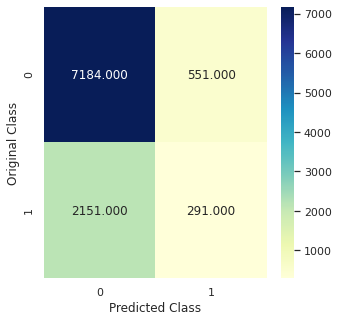

Precision :  0.34560570071258906
Recall :  0.11916461916461916
Train ROC_AUC: 0.8230828253044133
Test ROC_AUC: 0.6100254806137159


In [ ]:
clf = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.5, gamma=0,
               learning_rate=0.1, max_delta_step=0, max_depth=5,
               min_child_weight=3, missing=None, n_estimators=300, n_jobs=1,
               nthread=None, objective='binary:logistic',
               prdictor='gpu_predictor', random_state=0, reg_alpha=0,
               reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
               subsample=0.9, tree_method='gpu_hist', verbosity=1)

clf.fit(train_df,y_train)


y_pred_tr =clf.predict_proba(train_df)[:,1]
y_pred_te = clf.predict_proba(test_df)[:,1]
#Import scikit-learn metrics module for accuracy calculation

# Model Accuracy, how often is the classifier correct?

plot_confusion_matrix(test_y=y_train, predict_y = clf.predict(train_df))
plot_confusion_matrix(test_y=y_test, predict_y = clf.predict(test_df))

print("Train ROC_AUC:",metrics.roc_auc_score(y_train, y_pred_tr))
print("Test ROC_AUC:",metrics.roc_auc_score(y_test, y_pred_te))

4. reg_alpha and reg_lambda:

In [ ]:
param_test6 = {
 'reg_alpha':[1e-2, 0.1 ,0, 1, 10, 100],
 'reg_lambda':[1e-2, 0.1 ,0 ,1 ,10 , 100]
}

clf = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.5, gamma=0,
               learning_rate=0.1, max_delta_step=0, max_depth=5,
               min_child_weight=3, missing=None, n_estimators=300, n_jobs=1,
               nthread=None, objective='binary:logistic',
               prdictor='gpu_predictor', random_state=0, reg_alpha=0,
               reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
               subsample=0.9, tree_method='gpu_hist', verbosity=1)
 

gsearch1 = GridSearchCV(estimator =clf,param_grid = param_test6,scoring='roc_auc',cv = 5,verbose=3)
gsearch1.fit(train_df,y_train)

gsearch1.best_params_,gsearch1.best_estimator_

In [ ]:
param_test6 = {
 'reg_alpha':[1,3,5,8],
 'reg_lambda':[1,3,5,8 ]
}

clf = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.5, gamma=0,
               learning_rate=0.1, max_delta_step=0, max_depth=5,
               min_child_weight=3, missing=None, n_estimators=300, n_jobs=1,
               nthread=None, objective='binary:logistic',
               prdictor='gpu_predictor', random_state=0, reg_alpha=1,
               reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
               subsample=0.9, tree_method='gpu_hist', verbosity=1)
 

gsearch1 = GridSearchCV(estimator =clf,param_grid = param_test6,scoring='roc_auc',cv = 5,verbose=3)
gsearch1.fit(train_df,y_train)

gsearch1.best_params_,gsearch1.best_estimator_

-------------------- Confusion matrix --------------------


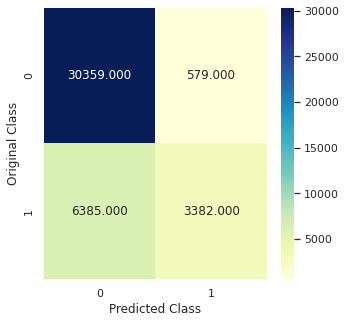

Precision :  0.8538247917192628
Recall :  0.34626804545919937
-------------------- Confusion matrix --------------------


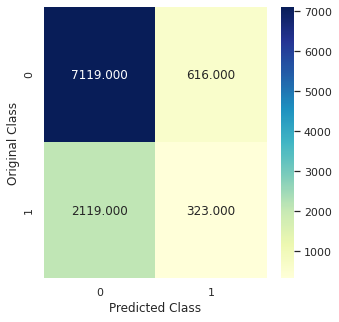

Precision :  0.3439829605963791
Recall :  0.13226863226863228
Train ROC_AUC: 0.8874619940098509
Test ROC_AUC: 0.6171645524586701


In [ ]:
clf =xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.5, gamma=0,
               learning_rate=0.1, max_delta_step=0, max_depth=7,
               min_child_weight=3, missing=None, n_estimators=300, n_jobs=1,
               nthread=None, objective='binary:logistic',
               prdictor='gpu_predictor', random_state=0, reg_alpha=1,
               reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
               subsample=0.9, tree_method='gpu_hist', verbosity=1)

clf.fit(train_df,y_train)


y_pred_tr =clf.predict_proba(train_df)[:,1]
y_pred_te = clf.predict_proba(test_df)[:,1]
#Import scikit-learn metrics module for accuracy calculation

# Model Accuracy, how often is the classifier correct?

plot_confusion_matrix(test_y=y_train, predict_y = clf.predict(train_df))
plot_confusion_matrix(test_y=y_test, predict_y = clf.predict(test_df))

print("Train ROC_AUC:",metrics.roc_auc_score(y_train, y_pred_tr))
print("Test ROC_AUC:",metrics.roc_auc_score(y_test, y_pred_te))

In [ ]:
clf =xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
               colsample_bynode=1, colsample_bytree=0.5, gamma=0,
               learning_rate=0.05, max_delta_step=0, max_depth=7,
               min_child_weight=3, missing=None, n_estimators=1000, n_jobs=1,
               nthread=None, objective='binary:logistic',
               prdictor='gpu_predictor', random_state=0, reg_alpha=1,
               reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
               subsample=0.9, tree_method='gpu_hist', verbosity=1)
evaluate(clf ,train_df,y_train,test_df,y_test)

Number of estimators:  359
train roc_auc_score =  0.8484348071061618
test roc_auc_score =  0.6174249968367616


In [ ]:
clf = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
               colsample_bynode=1, colsample_bytree=0.5, gamma=0,
               learning_rate=0.05, max_delta_step=0, max_depth=7,
               min_child_weight=3, missing=None, n_estimators=1000, n_jobs=1,
               nthread=None, objective='binary:logistic',
               prdictor='gpu_predictor', random_state=0, reg_alpha=1,
               reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
               subsample=0.9, tree_method='gpu_hist', verbosity=1)
evaluate(clf ,train_df,y_train,test_df,y_test)

#0.7

Number of estimators:  478
train roc_auc_score =  0.866870258482332
test roc_auc_score =  0.6192786016315428


# Final Xgboost

-------------------- Confusion matrix --------------------


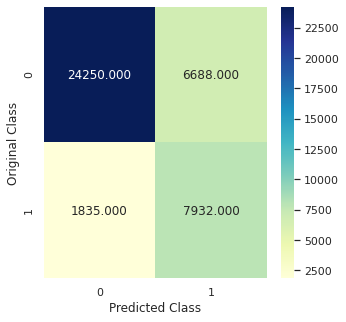

Precision :  0.5425444596443229
Recall :  0.8121224531585952
-------------------- Confusion matrix --------------------


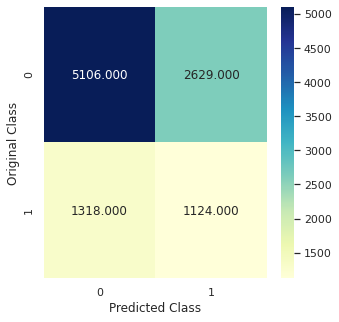

Precision :  0.2994937383426592
Recall :  0.46027846027846026
Train ROC_AUC: 0.8851145369307991
Test ROC_AUC: 0.6044827721298309


In [ ]:
clf1 = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
               colsample_bynode=1, colsample_bytree=0.5, gamma=0,
               learning_rate=0.05, max_delta_step=0, max_depth=7,
               min_child_weight=3, missing=None, n_estimators=500, n_jobs=1,
               nthread=None, objective='binary:logistic',
               prdictor='gpu_predictor', random_state=0, reg_alpha=1,
               reg_lambda=1, scale_pos_weight=3, seed=None, silent=None,
               subsample=0.9, tree_method='gpu_hist', verbosity=1)

clf1.fit(train_df,y_train)


y_pred_tr =clf1.predict_proba(train_df)[:,1]
y_pred_te = clf1.predict_proba(test_df)[:,1]
#Import scikit-learn metrics module for accuracy calculation

# Model Accuracy, how often is the classifier correct?

plot_confusion_matrix(test_y=y_train, predict_y = clf1.predict(train_df))
plot_confusion_matrix(test_y=y_test, predict_y = clf1.predict(test_df))

print("Train ROC_AUC:",metrics.roc_auc_score(y_train, y_pred_tr))
print("Test ROC_AUC:",metrics.roc_auc_score(y_test, y_pred_te))

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

model = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
               colsample_bynode=1, colsample_bytree=0.5, gamma=0,
               learning_rate=0.05, max_delta_step=0, max_depth=7,
               min_child_weight=3, missing=None, n_estimators=500, n_jobs=1,
               nthread=None, objective='binary:logistic',
               prdictor='gpu_predictor', random_state=0, reg_alpha=1,
               reg_lambda=1, scale_pos_weight=3.167, seed=None, silent=None,
               subsample=0.9, tree_method='gpu_hist', verbosity=1)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, train_df,y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.5f',np.mean(scores))

Mean ROC AUC: %.5f 0.7423808772579588


-------------------- Confusion matrix --------------------


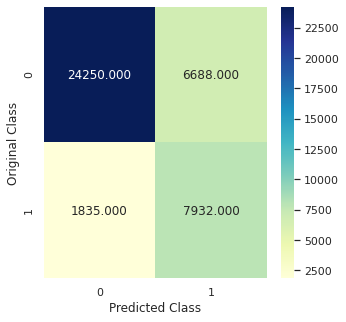

Precision :  0.5425444596443229
Recall :  0.8121224531585952
-------------------- Confusion matrix --------------------


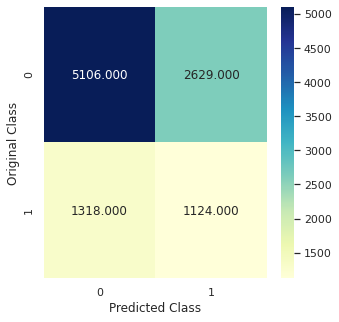

Precision :  0.2994937383426592
Recall :  0.46027846027846026
Train ROC_AUC: 0.8851145369307991
Test ROC_AUC: 0.6044827721298309


In [ ]:
model = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
               colsample_bynode=1, colsample_bytree=0.5, gamma=0,
               learning_rate=0.05, max_delta_step=0, max_depth=7,
               min_child_weight=3, missing=None, n_estimators=500, n_jobs=1,
               nthread=None, objective='binary:logistic',
               prdictor='gpu_predictor', random_state=0, reg_alpha=1,
               reg_lambda=1, scale_pos_weight=3, seed=None, silent=None,
               subsample=0.9, tree_method='gpu_hist', verbosity=1)
model.fit(train_df,y_train)


y_pred_tr =model.predict_proba(train_df)[:,1]
y_pred_te = model.predict_proba(test_df)[:,1]
#Import scikit-learn metrics module for accuracy calculation

# Model Accuracy, how often is the classifier correct?

plot_confusion_matrix(test_y=y_train, predict_y = model.predict(train_df))
plot_confusion_matrix(test_y=y_test, predict_y = model.predict(test_df))

print("Train ROC_AUC:",roc_auc_score(y_train, y_pred_tr))
print("Test ROC_AUC:",roc_auc_score(y_test, y_pred_te))

In [49]:
import lightgbm as lgb
d_train = lgb.Dataset(train_df,label = y_train)


lgbm_params = {'learning_rate':0.05,'boosting_type':'gbdt',
                'objective':'binary','metric':'auc','min_data_in_leaf':5 ,
               'num_levels':50,'max_depth':7,'scale_pos_weight':1}

clf = lgb.train(lgbm_params,d_train,500)
pred_tr = clf.predict(train_df)
pred_te = clf.predict(test_df)


#plot_confusion_matrix(test_y=y_train_res, predict_y = clf.predict(train_df))
#plot_confusion_matrix(test_y=y_test, predict_y = clf.predict(test_df))

print("Train ROC_AUC:",metrics.roc_auc_score(y_train,pred_tr ))
print("Test ROC_AUC:",metrics.roc_auc_score(y_test,pred_te ))

Train ROC_AUC: 0.8587590172236196
Test ROC_AUC: 0.6221963780787311


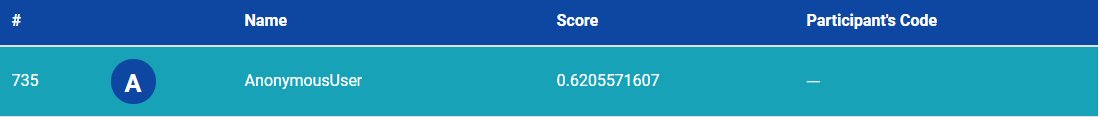

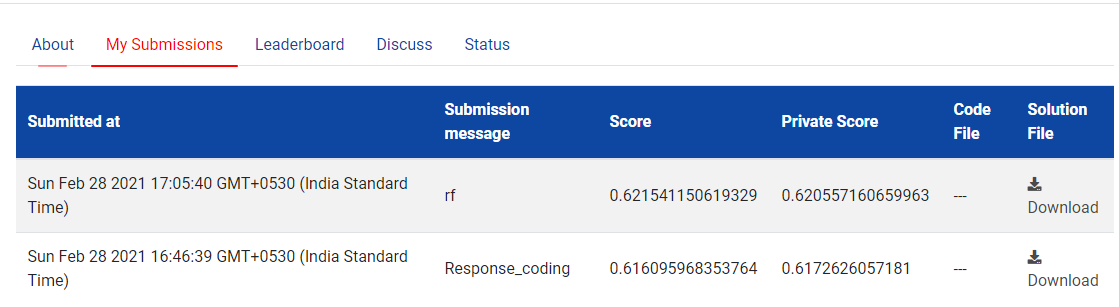

# Target Encoding

In [50]:
ls = list(train_df.columns)

columns = ls[1:]

train_df1 = train_df[columns]
test_df1 = test_df[columns]


-------------------- Confusion matrix --------------------


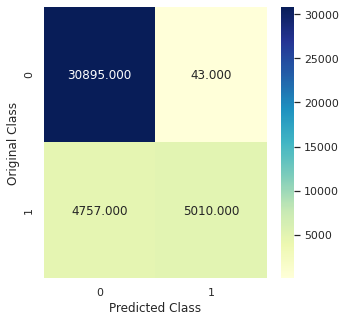

Precision :  0.9914902038393034
Recall :  0.5129517763898843
-------------------- Confusion matrix --------------------


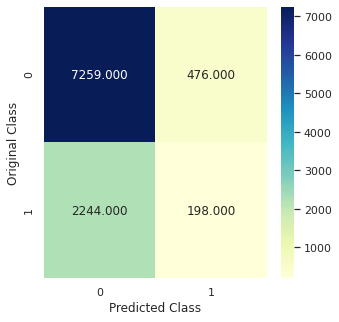

Precision :  0.29376854599406527
Recall :  0.08108108108108109
Train ROC_AUC: 0.9957611812202798
Test ROC_AUC: 0.5964735317676494


In [51]:
rf1 = RandomForestClassifier(n_estimators=2000 ,min_samples_leaf=2,min_samples_split=7,max_depth=40,n_jobs = -1)
rf1.fit(train_df1,y_train)

y_pred_tr =rf1.predict_proba(train_df1)[:,1]
y_pred_te = rf1.predict_proba(test_df1)[:,1]
#Import scikit-learn metrics module for accuracy calculation

# Model Accuracy, how often is the classifier correct?

plot_confusion_matrix(test_y=y_train, predict_y = rf1.predict(train_df1))
plot_confusion_matrix(test_y=y_test, predict_y = rf1.predict(test_df1))

print("Train ROC_AUC:",metrics.roc_auc_score(y_train, y_pred_tr))
print("Test ROC_AUC:",metrics.roc_auc_score(y_test, y_pred_te))

In [ ]:
clf2 =xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
               colsample_bynode=1, colsample_bytree=0.5, gamma=0,
               learning_rate=0.05, max_delta_step=0, max_depth=5,
               min_child_weight=3, missing=None, n_estimators=1000, n_jobs=1,
               nthread=None, objective='binary:logistic',
               prdictor='gpu_predictor', random_state=0, reg_alpha=1,
               reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
               subsample=0.9, tree_method='gpu_hist', verbosity=1)
evaluate(clf2 ,train_df1,y_train,test_df1,y_test)

Number of estimators:  851
train roc_auc_score =  0.8197821361982693
test roc_auc_score =  0.6093165446106623


-------------------- Confusion matrix --------------------


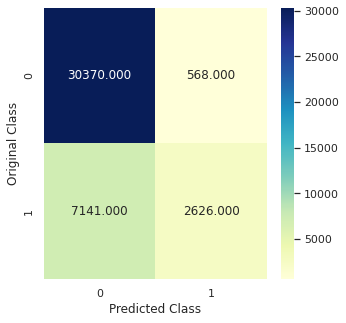

Precision :  0.8221665623043206
Recall :  0.2688645438722228
-------------------- Confusion matrix --------------------


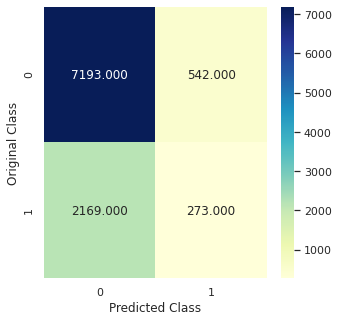

Precision :  0.33496932515337424
Recall :  0.11179361179361179
Train ROC_AUC: 0.8580476313436975
Test ROC_AUC: 0.6084224731283555


In [ ]:
clf2 = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
               colsample_bynode=1, colsample_bytree=0.5, gamma=0,
               learning_rate=0.05, max_delta_step=0, max_depth=7,
               min_child_weight=3, missing=None, n_estimators=500, n_jobs=1,
               nthread=None, objective='binary:logistic',
               prdictor='gpu_predictor', random_state=0, reg_alpha=1,
               reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
               subsample=0.9, tree_method='gpu_hist', verbosity=1)

clf2.fit(train_df1,y_train)


y_pred_tr =clf2.predict_proba(train_df1)[:,1]
y_pred_te = clf2.predict_proba(test_df1)[:,1]
#Import scikit-learn metrics module for accuracy calculation

# Model Accuracy, how often is the classifier correct?

plot_confusion_matrix(test_y=y_train, predict_y = clf2.predict(train_df1))
plot_confusion_matrix(test_y=y_test, predict_y = clf2.predict(test_df1))

print("Train ROC_AUC:",metrics.roc_auc_score(y_train, y_pred_tr))
print("Test ROC_AUC:",metrics.roc_auc_score(y_test, y_pred_te))

Remove Upper age and Lower Age

In [52]:
#columns = columns.remove('Upper_Age')
train_df2 = train_df1[columns]
test_df2 = test_df1[columns]


-------------------- Confusion matrix --------------------


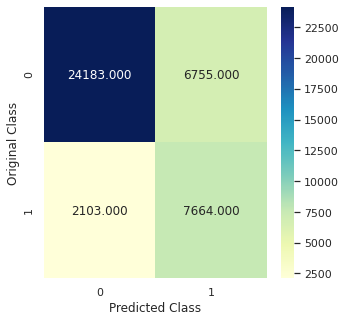

Precision :  0.5315209099105347
Recall :  0.7846831166171803
-------------------- Confusion matrix --------------------


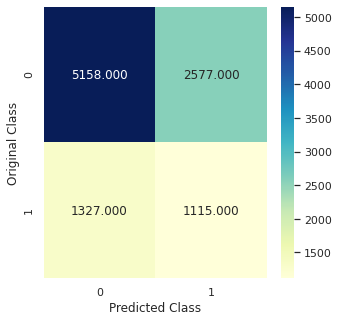

Precision :  0.30200433369447455
Recall :  0.45659295659295657
Train ROC_AUC: 0.8717781643074243
Test ROC_AUC: 0.6061294561294561


In [ ]:
clf2 = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
               colsample_bynode=1, colsample_bytree=0.5, gamma=0,
               learning_rate=0.05, max_delta_step=0, max_depth=7,
               min_child_weight=3, missing=None, n_estimators=500, n_jobs=1,
               nthread=None, objective='binary:logistic',
               prdictor='gpu_predictor', random_state=0, reg_alpha=1,
               reg_lambda=1, scale_pos_weight=3, seed=None, silent=None,
               subsample=0.9, tree_method='gpu_hist', verbosity=1)

clf2.fit(train_df2,y_train)


y_pred_tr =clf2.predict_proba(train_df2)[:,1]
y_pred_te = clf2.predict_proba(test_df2)[:,1]
#Import scikit-learn metrics module for accuracy calculation

# Model Accuracy, how often is the classifier correct?

plot_confusion_matrix(test_y=y_train, predict_y = clf2.predict(train_df2))
plot_confusion_matrix(test_y=y_test, predict_y = clf2.predict(test_df2))

print("Train ROC_AUC:",metrics.roc_auc_score(y_train, y_pred_tr))
print("Test ROC_AUC:",metrics.roc_auc_score(y_test, y_pred_te))

In [53]:
import lightgbm as lgb
d_train = lgb.Dataset(train_df,label = y_train)


lgbm_params = {'learning_rate':0.05,'boosting_type':'gbdt',
                'objective':'binary','metric':'auc','min_data_in_leaf':5 ,
               'num_levels':50,'max_depth':7,'scale_pos_weight':1}

clf = lgb.train(lgbm_params,d_train,500)
pred_tr = clf.predict(train_df2)
pred_te = clf.predict(test_df2)


#plot_confusion_matrix(test_y=y_train_res, predict_y = clf.predict(train_df))
#plot_confusion_matrix(test_y=y_test, predict_y = clf.predict(test_df))

print("Train ROC_AUC:",metrics.roc_auc_score(y_train,pred_tr ))
print("Test ROC_AUC:",metrics.roc_auc_score(y_test,pred_te ))

Train ROC_AUC: 0.38229767745824667
Test ROC_AUC: 0.5027199880141056
